<a href="https://colab.research.google.com/github/rjlobosco/Detector_veiculos_velocidade/blob/main/botafogo_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from datetime import datetime, timedelta
%pip install cdsapi
%pip install netcdf4
import cdsapi
import xarray as xr
import pandas as pd
!pip install pvlib
!pip uninstall -y jupyter-kernel-gateway
!pip install -U notebook ipywidgets jupyterlab_widgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.6 MB/s eta 0:00:00
Found existing installation: jupyter_kernel_gateway 2.5.2
Uninstalling jupyter_kernel_gateway-2.5.2:
  Successfully uninstalled jupyter_kernel_gateway-2.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existi

In [15]:
!pip install xarray cfgrib eccodes pandas
import xarray as xr
import pandas as pd

In [14]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2025"],
    "month": ["05"],
    "day": ["30"],
    "time": ["08:00", "12:00", "20:00"],
    "data_format": "grib",
    "download_format": "unarchived",
    "area": [-22.94, -43.19, -22.95, -43.17]
}
# Correcting the URL for the cdsapi.Client to the proper API endpoint
client = cdsapi.Client(url='https://cds.climate.copernicus.eu/api', key='83dbd0a2-6dc2-4406-ba2f-ebb558e108f6', verify=False)
client.retrieve(dataset, request).download()
#client.retrieve(dataset, request, nc_filename)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2026-02-13 11:35:26,455 INFO [2025-12

6e0ba8bfa93f4a6d3b81d2e276ae2e.grib:   0%|          | 0.00/330 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'object-store.os-api.cci2.ecmwf.int'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'6e0ba8bfa93f4a6d3b81d2e276ae2e.grib'

In [16]:
!pip install xarray cfgrib eccodes pandas
import xarray as xr

# The error 'unrecognized engine 'cfgrib'' usually means that xarray hasn't registered
# the cfgrib engine even if it's installed. A common fix is to restart the runtime
# (Runtime -> Restart runtime...) and then re-run all cells, including this one.
# The filename has also been corrected to the one downloaded in the previous step.
ds = xr.open_dataset(
    '6e0ba8bfa93f4a6d3b81d2e276ae2e.grib',
    engine='cfgrib')
df_temperature = ds.to_dataframe()
df_temperature.to_csv('output_temperature.csv', index=True)

In [17]:
df_temperature

,,,number,step,surface,valid_time,t2m
time,latitude,longitude,,,,,
2025-05-30 08:00:00,-22.95,-43.19,0,0 days,0.0,2025-05-30 08:00:00,292.967285
2025-05-30 12:00:00,-22.95,-43.19,0,0 days,0.0,2025-05-30 12:00:00,293.867188
2025-05-30 20:00:00,-22.95,-43.19,0,0 days,0.0,2025-05-30 20:00:00,293.923828


In [19]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


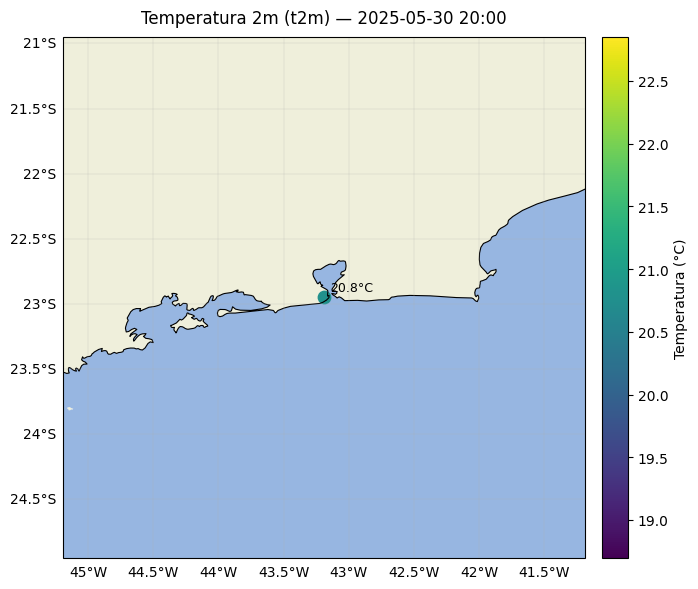

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.tri import Triangulation, LinearTriInterpolator

# --- Load data ---
path = "output_temperature.csv"
df = pd.read_csv(path)

# Use valid_time if present; otherwise use time
time_col = "valid_time" if "valid_time" in df.columns else "time"
df[time_col] = pd.to_datetime(df[time_col])

# Select one timestamp (latest by default)
t_sel = df[time_col].max()
dft = df[df[time_col] == t_sel].copy()

# Temperature: assume t2m in Kelvin -> Celsius
temp_c = dft["t2m"].astype(float).to_numpy() - 273.15
lons = dft["longitude"].astype(float).to_numpy()
lats = dft["latitude"].astype(float).to_numpy()

# --- Map extent (auto with buffer) ---
buf = 2.0
extent = [lons.min()-buf, lons.max()+buf, lats.min()-buf, lats.max()+buf]

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Base features
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# If enough unique points exist, build a contour; else scatter
unique_xy = np.unique(np.column_stack([lons, lats]), axis=0)

if unique_xy.shape[0] >= 3:
    tri = Triangulation(lons, lats)
    interp = LinearTriInterpolator(tri, temp_c)

    gx = np.linspace(extent[0], extent[1], 250)
    gy = np.linspace(extent[2], extent[3], 250)
    GX, GY = np.meshgrid(gx, gy)
    GZ = np.ma.masked_invalid(interp(GX, GY))

    cf = ax.contourf(GX, GY, GZ, levels=15, transform=ccrs.PlateCarree())
    plt.colorbar(cf, ax=ax, pad=0.02, label="Temperatura (°C)")
else:
    sc = ax.scatter(lons, lats, c=temp_c, s=80, transform=ccrs.PlateCarree())
    plt.colorbar(sc, ax=ax, pad=0.02, label="Temperatura (°C)")
    for x, y, v in zip(lons, lats, temp_c):
        ax.text(x+0.05, y+0.05, f"{v:.1f}°C",
                transform=ccrs.PlateCarree(), fontsize=9)

gl = ax.gridlines(draw_labels=True, linewidth=0.3, alpha=0.6)
gl.top_labels = False
gl.right_labels = False

ax.set_title(f"Temperatura 2m (t2m) — {t_sel:%Y-%m-%d %H:%M}", pad=10)

plt.tight_layout()
plt.savefig("temperature_map_cartopy.png", dpi=250)
plt.show()


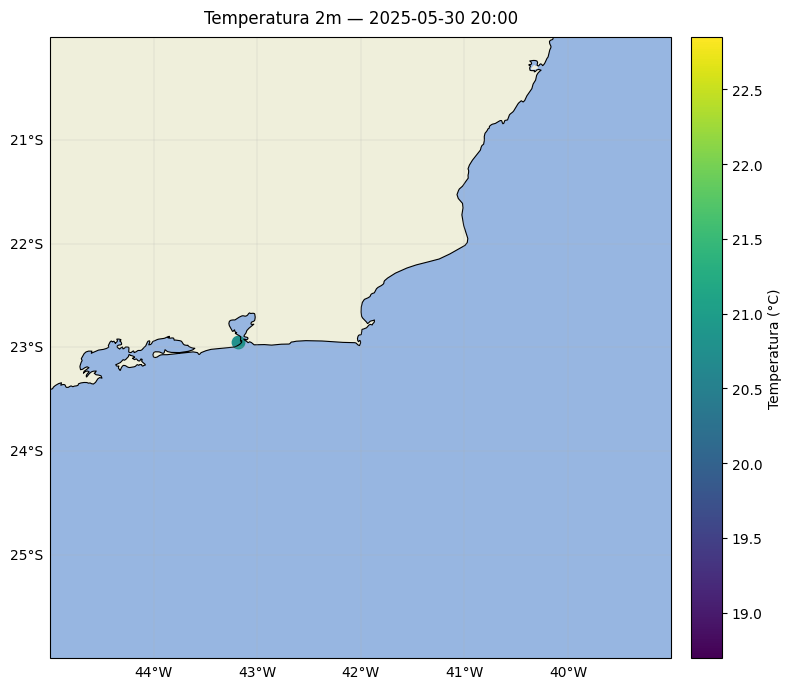

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.tri import Triangulation, LinearTriInterpolator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ---------------------------
# 1) Ler dados
# ---------------------------
path = "output_temperature.csv"
df = pd.read_csv(path)

time_col = "valid_time" if "valid_time" in df.columns else "time"
df[time_col] = pd.to_datetime(df[time_col])

t_sel = df[time_col].max()
dft = df[df[time_col] == t_sel].copy()

lons = dft["longitude"].astype(float).to_numpy()
lats = dft["latitude"].astype(float).to_numpy()
temp_c = dft["t2m"].astype(float).to_numpy() - 273.15

# ---------------------------
# 2) Definir áreas (AJUSTE AQUI)
# Campos + Santos (aprox.): lon -45 a -39, lat -26 a -20
# ---------------------------
main_extent = [-45.0, -39.0, -26.0, -20.0]   # [lon_min, lon_max, lat_min, lat_max]
zoom_extent = [-43.5, -41.0, -24.5, -22.2]   # exemplo de subárea (ajuste)

# ---------------------------
# 3) Funções auxiliares
# ---------------------------
def add_base(ax):
    ax.add_feature(cfeature.LAND, zorder=0)
    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, alpha=0.6)
    gl.top_labels = False
    gl.right_labels = False

def field_on_grid(extent, nx=350, ny=350):
    """Interpolar dados irregulares em uma grade regular para contourf."""
    tri = Triangulation(lons, lats)
    interp = LinearTriInterpolator(tri, temp_c)

    gx = np.linspace(extent[0], extent[1], nx)
    gy = np.linspace(extent[2], extent[3], ny)
    GX, GY = np.meshgrid(gx, gy)
    GZ = np.ma.masked_invalid(interp(GX, GY))
    return GX, GY, GZ

# ---------------------------
# 4) Plot
# ---------------------------
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(main_extent, crs=ccrs.PlateCarree())
add_base(ax)

unique_xy = np.unique(np.column_stack([lons, lats]), axis=0)

if unique_xy.shape[0] >= 3:
    # Interpolação em grade para visual “liso”
    GX, GY, GZ = field_on_grid(main_extent, nx=450, ny=450)

    # Níveis: usar percentis para realçar gradientes sem “achatar” a escala
    vmin = float(np.nanpercentile(temp_c, 5))
    vmax = float(np.nanpercentile(temp_c, 95))
    levels = np.linspace(vmin, vmax, 18)

    # Campo preenchido
    cf = ax.contourf(GX, GY, GZ, levels=levels, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(cf, ax=ax, pad=0.02, shrink=0.9)
    cbar.set_label("Temperatura (°C)")

    # Linhas de contorno para destacar gradiente
    cs = ax.contour(GX, GY, GZ, levels=levels[::2], linewidths=0.6, transform=ccrs.PlateCarree())
    ax.clabel(cs, inline=True, fontsize=8, fmt="%.1f")

    # --- Inset (zoom) ---
    axins = inset_axes(ax, width="38%", height="38%", loc="lower left", borderpad=1.2,
                       axes_class=plt.Axes, axes_kwargs=dict(projection=ccrs.PlateCarree()))
    axins.set_extent(zoom_extent, crs=ccrs.PlateCarree())
    add_base(axins)

    GXz, GYz, GZz = field_on_grid(zoom_extent, nx=300, ny=300)
    axins.contourf(GXz, GYz, GZz, levels=levels, transform=ccrs.PlateCarree())
    axins.contour(GXz, GYz, GZz, levels=levels[::2], linewidths=0.5, transform=ccrs.PlateCarree())

    # Retângulo mostrando a área do zoom no mapa principal
    import matplotlib.patches as mpatches
    rect = mpatches.Rectangle((zoom_extent[0], zoom_extent[2]),
                              zoom_extent[1]-zoom_extent[0],
                              zoom_extent[3]-zoom_extent[2],
                              fill=False, linewidth=1.5,
                              transform=ccrs.PlateCarree())
    ax.add_patch(rect)

else:
    # Sem pontos suficientes para gradiente
    sc = ax.scatter(lons, lats, c=temp_c, s=80, transform=ccrs.PlateCarree())
    plt.colorbar(sc, ax=ax, pad=0.02, label="Temperatura (°C)")
    ax.set_title("Poucos pontos espaciais: não é possível gerar contorno/gradiente", pad=10)

ax.set_title(f"Temperatura 2m — {t_sel:%Y-%m-%d %H:%M}", pad=10)
plt.tight_layout()
plt.savefig("temperature_zoom_gradient.png", dpi=300)
plt.show()